In [6]:
%matplotlib inline
import numpy as np
from scipy import stats
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
# Generate random data.
n = 1000
m1, m2 = np.random.normal(-3., 3., size=n), np.random.normal(-3., 3., size=n)
# Define limits.
xmin, xmax = min(m1), max(m1)
ymin, ymax = min(m2), max(m2)
ext_range = [xmin, xmax, ymin, ymax]
# Format data.
x, y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([x.ravel(), y.ravel()])
values = np.vstack([m1, m2])

# Define some point to evaluate the KDEs.
x1, y1 = 0.5, 0.5
# Bandwidth value.
bw = 0.15


In [3]:
# -------------------------------------------------------
# Perform a kernel density estimate on the data using scipy.
# **Bandwidth needs to be scaled to match Sklearn results**
kernel = stats.gaussian_kde(
    values, bw_method=bw/np.asarray(values).std(ddof=1))
# Get KDE value for the point.
iso1 = kernel((x1, y1))
print 'iso1 = ', iso1[0]

iso1 =  0.00296405766394


In [4]:
# -------------------------------------------------------
# Perform a kernel density estimate on the data using sklearn.
kernel_sk = KernelDensity(kernel='gaussian', bandwidth=bw).fit(zip(*values))
# Get KDE value for the point. Use exponential since sklearn returns the
# log values
iso2 = np.exp(kernel_sk.score_samples([[x1, y1]]))
print 'iso2 = ', iso2[0]

iso2 =  0.00297056483482


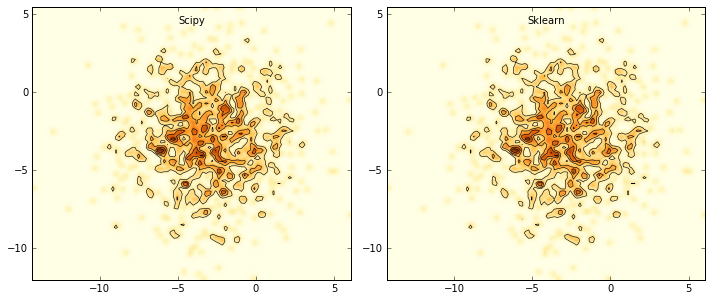

In [7]:
# Plot
fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(1, 2)

# Scipy
plt.subplot(gs[0])
plt.title("Scipy", x=0.5, y=0.92, fontsize=10)
# Evaluate kernel in grid positions.
k_pos = kernel(positions)
kde = np.reshape(k_pos.T, x.shape)
plt.imshow(np.rot90(kde), cmap=plt.cm.YlOrBr, extent=ext_range)
plt.contour(x, y, kde, 5, colors='k', linewidths=0.6)

# Sklearn
plt.subplot(gs[1])
plt.title("Sklearn", x=0.5, y=0.92, fontsize=10)
# Evaluate kernel in grid positions.
k_pos2 = np.exp(kernel_sk.score_samples(zip(*positions)))
kde2 = np.reshape(k_pos2.T, x.shape)
plt.imshow(np.rot90(kde2), cmap=plt.cm.YlOrBr, extent=ext_range)
plt.contour(x, y, kde2, 5, colors='k', linewidths=0.6)

fig.tight_layout()
plt.savefig('KDEs', dpi=300, bbox_inches='tight')